In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("C:/Users/ullas/Documents/MSc Data Analytics Capstone Project/Datasets/Passenger Journeys by Public Transport.csv")

In [3]:
# Preview
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0


In [4]:
# Basic Statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         TLIST(A1)         Year  C03935V04687  C01198V01436         VALUE
count  1060.000000  1060.000000   1060.000000   1060.000000  8.680000e+02
mean   2021.000000  2021.000000     25.000000     27.000000  1.665662e+06
std       1.414881     1.414881     11.185617     15.304279  1.367626e+06
min    2019.000000  2019.000000     10.000000      1.000000  2.323100e+04
25%    2020.000000  2020.000000     17.500000     14.000000  5.799855e+05
50%    2021.000000  2021.000000     25.000000     27.000000  9.101360e+05
75%    2022.000000  2022.000000     32.500000     40.000000  2.875604e+06
max    2023.000000  2023.000000     40.000000     53.000000  5.075079e+06


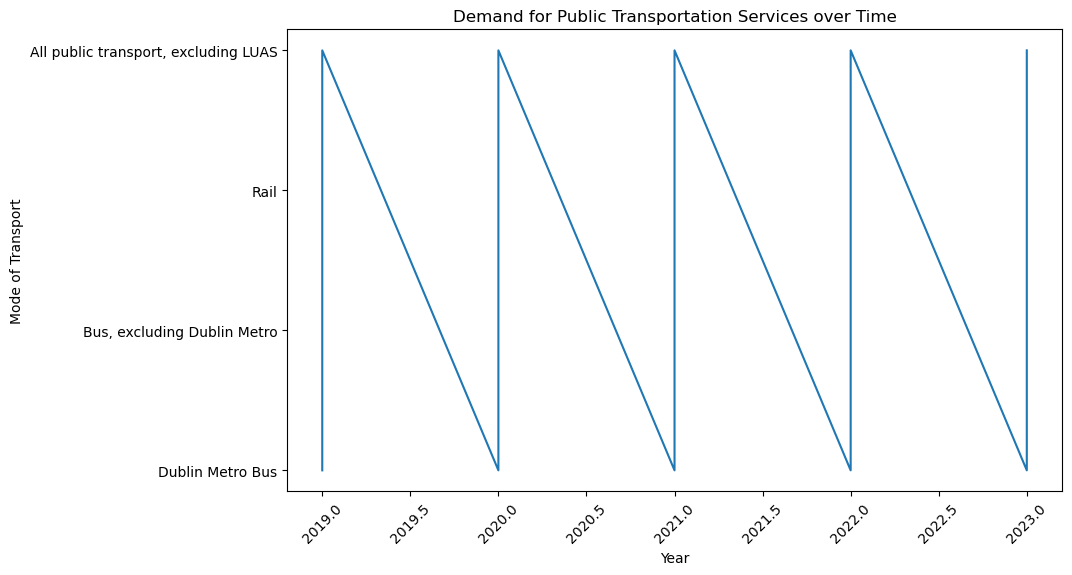

In [5]:
# Data Visualization
# Line plot to visualize demand over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mode of Transport'])
plt.xlabel('Year')
plt.ylabel('Mode of Transport')
plt.title('Demand for Public Transportation Services over Time')
plt.xticks(rotation=45)
plt.show()